# Initial Data Wrangling

In order to begin this Facebook metrics analysis, the initial step involves loading, exploring and cleaning our dataset to prepare for the next steps. The initial steps can be found in this notebook where our dataset - which can be found using the link below - is prepared for exploratory data analysis and machine learning model building.

Data: https://archive.ics.uci.edu/dataset/368/facebook+metrics 

This dataset is fairly clean since it was used for a separate paper but we still evaluate it for the purpose of this project. 

## Imports

All the necessary imports needed for our data wrangling. 

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme()

## Loading Data

Here we load our data and get an initial peek at what our data looks like. 

In [2]:
df = pd.read_csv("../data/facebook.csv", sep=";")

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.shape

(500, 19)

From our initial peek at our dataset we can see that there are 500 rows and 19 columns in our dataset. We can also see that most of our columns are numerical values with some being quantitative data types but others being numerical values that are qualitative.

## Data Wrangling

The first step in the data wrangling process is identify and handle any missing data in our dataset.

In [5]:
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [6]:
#selecting columns where share column is NA
df[df['share'].isna()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
111,136736,Photo,1,10,6,8,0.0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0
120,136393,Photo,1,10,7,9,0.0,584,1029,273,271,308,943,511,232,0,2.0,NaN,2
124,136393,Photo,1,10,7,6,0.0,677,1285,251,246,297,1210,615,211,0,7.0,NaN,7
164,135428,Photo,1,9,5,10,0.0,1060,2004,266,251,337,1705,870,204,0,18.0,NaN,18


As we can see the `share` column has the max amount of Null values with 4. By selecting the 4 rows that have a Null value in the `share` column we get a better understanding of the missing data. In this scenario it is difficult to understand if the missing values can be interpreted as 0 shares. This is the reason why instead of running the risk of interpreting the missing values incorrectly we will just drop the rows with missing values.

In [7]:
#drop rows with missing values
df = df.dropna()

In [8]:
df.shape

(495, 19)

It is also important to understand that some of our data columns should have specific ranges. These columns run the risk of having data that pass through as not missing but can also not make sense in the context of the column which would affect our analysis. For example using the describe method below we get a better understading of the columns that should have a specific range. 

The `Post Month` column represents the month the post was posted on, using our understanding of months we should see that our data for this column should take on values ranging from 1 (January) to 12 (December). From our describe we see that our min and max values reflect this range which means that all our data points for this column make sense.

The same can be said for our `Post Weekday` and `Post Hour` columns where the range for the former reflects the 1st and 7th day of the week and the range for the latter refects the 1st and 23rd hour. We can see that both these columns have data values that make sense in the context of the column. 

In [9]:
df.iloc[:, 3:6].describe()

,Post Month,Post Weekday,Post Hour
count,495.000000,495.000000,495.000000
mean,7.028283,4.133333,7.844444
std,3.304274,2.030735,4.385064
min,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000
50%,7.000000,4.000000,9.000000
75%,10.000000,6.000000,11.000000
max,12.000000,7.000000,23.000000


For the other columns that don't have a specific range we can get a better understanding of their distribution as well.

In [10]:
df.iloc[:, 6:].describe()

,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


We also need to get a better understanding of our categorical data. So in the cells below we take a look at the distributions of our categorical data and look for any irregularities or anything that sticks out. 

<AxesSubplot:xlabel='Type', ylabel='count'>

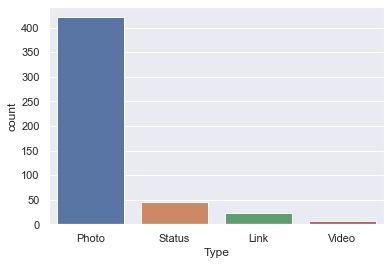

In [11]:
#plot distribution of Type column
sns.countplot(x='Type', data=df)

<AxesSubplot:xlabel='Category', ylabel='count'>

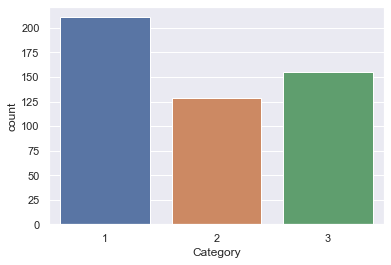

In [12]:
#plot distribution of Category column
sns.countplot(x='Category', data=df)

In [13]:
#identify the counts of each category by type
grouped_df = df.groupby('Type')['Category'].value_counts().to_frame().reset_index()

grouped_df

,Type,Category,count
0,Link,1,20
1,Link,2,1
2,Link,3,1
3,Photo,1,181
4,Photo,3,150
5,Photo,2,90
6,Status,2,38
7,Status,3,4
8,Status,1,3
9,Video,1,7


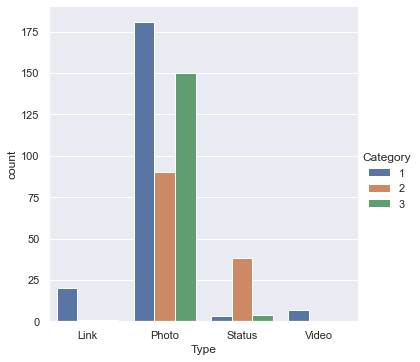

In [14]:
#plot distribution of category by type
sns.catplot(
    data=grouped_df, kind='bar',
    x='Type', y='count', hue='Category'
)

<AxesSubplot:xlabel='Post Month', ylabel='count'>

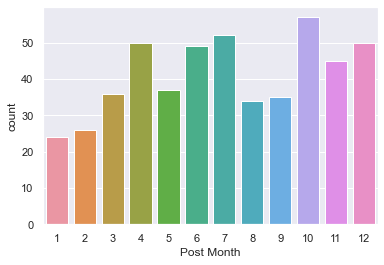

In [15]:
#plot distribution of month
sns.countplot(x='Post Month', data=df)

<AxesSubplot:xlabel='Post Weekday', ylabel='count'>

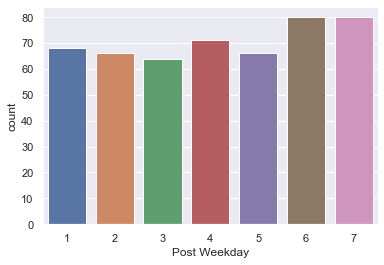

In [16]:
#plot distribution of day
sns.countplot(x='Post Weekday', data=df)

<AxesSubplot:xlabel='Post Hour', ylabel='count'>

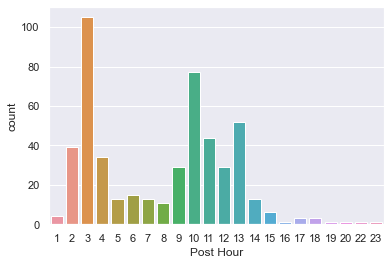

In [17]:
#plot distribution of hour
sns.countplot(x='Post Hour', data=df)

From initially looking at our data it seems like there aren't any major irregularities with the data. In order to get a deeper understanding of the data we would need to perform exploratory data analysis which is the next step. Our EDA will help us get a better picture of our distributions and will allow us to analyze any outliers. For now our data is perfectly fine to use for data analysis as is.

In order to make life easier in the next steps of the project there are some steps that could be taken now to save time in the future.

In [18]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

As we can see some of the column names for our dataframe are extremely long and confusing. In the final step of the data wrangling process we just need to rename some columns and remove excess columns we wont need. Since our analysis will focus on Total Interactions we wont need our comment, like and share columns. 

In [19]:
df = df.drop(['comment', 'like', 'share'], axis=1)

In [20]:
df = df.rename(columns={
    'Page total likes': 'total_likes',
    'Post Month': 'post_month',
    'Post Weekday': 'post_weekday',
    'Post Hour': 'post_hour',
    'Lifetime Post Total Reach': 'lifetime_reach',
    'Lifetime Post Total Impressions': 'lifetime_impressions',
    'Lifetime Engaged Users': 'lifetime_engaged_users',
    'Lifetime Post Consumers': 'lifetime_consumers',
    'Lifetime Post Consumptions': 'lifetime_consumptions',
    'Lifetime Post Impressions by people who have liked your Page': 'impressions_by_likers',
    'Lifetime Post reach by people who like your Page': 'reach_by_likers',
    'Lifetime People who have liked your Page and engaged with your post': 'likers_who_engaged',
    'Total Interactions': 'total_interactions'
})

df.columns = map(str.lower, df.columns)

In [21]:
df.head()

,total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_reach,lifetime_impressions,lifetime_engaged_users,lifetime_consumers,lifetime_consumptions,impressions_by_likers,reach_by_likers,likers_who_engaged,total_interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,393


## Wrapping It Up

The dataset for this project was fairly clean from the beginning. Through this initial data wrangling there were some slight alterations to better suit the dataset for the purpose of this project. This data wrangling ensured that the data made sense for the project and took care of any irregularities. This process also prepared our dataset to be more user friendly for the next notebooks to come, by handling our columns. 

In the next steps we can begin to distinguish which features are most relevant for our analysis and we can begin revealing relevant conclusions. 

In [22]:
df.to_csv('../data/facebook_clean.csv', index=False)